# K - Means Clustering

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# importing the data in features
X = df[["age", 'fare']]
X.age.fillna(value=X['age'].mean(), inplace=True)

#scaled data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

#perform clustering 
model = KMeans(n_clusters=5)
model.fit(X_scaled)

# assign cluster labels to the data
df['clusters'] = model.labels_


C:\Users\Hp\AppData\Local\Temp\ipykernel_9496\4273023716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(value=X['age'].mean(), inplace=True)
c:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,clusters
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,4
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [7]:
df['clusters'].unique()

array([4, 3, 0, 2, 1])

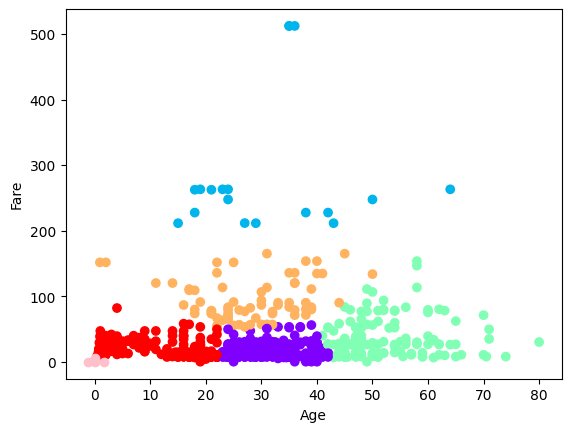

In [8]:
plt.scatter(df['age'], df['fare'], c= df['clusters'], cmap= 'rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color='pink')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

In [9]:
pip install plotly



SyntaxError: invalid syntax (1762361531.py, line 1)

In [ ]:
import plotly.express as px


# Saving A Model

In [10]:
# saving the model
import joblib 
joblib.dump(model, 'KMeansClustering.joblib')

['KMeansClustering.joblib']

In [ ]:
# load the saved model
model_loaded = joblib.load('KMeansClustering.joblib')

In [11]:
import seaborn as sns
df_1 = sns.load_dataset('tips')

In [17]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1['smoker'])

df_1['smoker']= le.transform(df_1['smoker'])

In [20]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,Sun,Dinner,2
1,10.34,1.66,Male,0,Sun,Dinner,3
2,21.01,3.50,Male,0,Sun,Dinner,3
3,23.68,3.31,Male,0,Sun,Dinner,2
4,24.59,3.61,Female,0,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,Sat,Dinner,3
240,27.18,2.00,Female,1,Sat,Dinner,2
241,22.67,2.00,Male,1,Sat,Dinner,2
242,17.82,1.75,Male,0,Sat,Dinner,2


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1['day'])

df_1['day']= le.transform(df_1['day'])

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_1['time'])

df_1['time']= le.transform(df_1['time'])

In [28]:
X = df_1.drop(columns=['sex'])
y= df_1['sex']

In [29]:
X.head()


,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [30]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [31]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [32]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X,y)




In [33]:
joblib.dump(model, 'DecisionTreeClassifier.joblib')

['DecisionTreeClassifier.joblib']

In [34]:
joblib.load('DecisionTreeClassifier.joblib')

DecisionTreeClassifier()

In [35]:
import pickle
#save the model 
pickle.dump(model, open('DecisionTreeClassifier.pkl', 'wb'))

In [38]:
#load the model
with open('DecisionTreeClassifier.pkl', 'rb') as f:
    model_loaded = pickle.load(f)